# PCA Lab II

In [37]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

## Step 1: Setup the Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [38]:
airports = pd.read_csv('C:/Users/Pat.NOAGALLERY/Documents/data_sources/airport_operations.csv')

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

In [39]:
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our "x" variable

In [40]:

x = airports.drop(['airport'], axis = 1)
y = airports['airport']


## Step 4: Covariance Matrix

Then, standardize the x variable for analysis

In [41]:
xStand = StandardScaler().fit_transform(x)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [42]:
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [43]:
print(eigenValues)
print(eigenVectors)

[  6.45349601e+00   4.30952372e+00   1.21824879e+00   7.37875394e-01
   5.10954558e-01   3.49353222e-01   1.66799275e-01   1.20220515e-01
   7.32036815e-02   6.41924376e-02   9.59074587e-03   2.34264664e-03
   1.64364385e-04   7.01306545e-04]
[[ -5.74761448e-02   5.25255722e-02   8.08909757e-01  -3.89143377e-01
   -1.51724877e-02  -4.04558235e-01  -3.91819608e-02  -1.31976220e-02
    1.43760537e-01  -7.77297605e-03  -3.10742763e-02  -2.93369275e-02
    2.29607095e-03   1.99299912e-03]
 [  1.16832935e-01  -4.11909290e-01   1.69808554e-01   4.02576136e-01
   -1.22740151e-01  -1.12320737e-01   2.90266529e-01   6.08203611e-02
    7.66594323e-02   3.32546414e-02  -2.17851714e-02   2.05754595e-02
    7.07995242e-01   3.17127569e-02]
 [  1.16407898e-01  -4.11581912e-01   1.71084289e-01   4.03871066e-01
   -1.25409356e-01  -1.09894006e-01   2.91346645e-01   6.55288643e-02
    9.06577905e-02   3.22166405e-02  -3.61597627e-02  -2.65374530e-02
   -7.03727342e-01  -3.44394613e-02]
 [ -3.14555883e-

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [44]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()

## Step 6: Explained Variance

In [45]:
eigenPairs
for i in eigenPairs:
    print(i[0])

6.45349600791
4.30952372449
1.21824878845
0.737875393589
0.510954557711
0.349353221606
0.166799275189
0.120220515247
0.0732036814776
0.0641924375551
0.0095907458676
0.00234264664452
0.000701306545385
0.00016436438493


Now, calculate the explained variance and the Cumulative explained variance

In [46]:

tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [52]:
print(cum_var_exp)


[  46.04158864   76.78729892   85.47872904   90.74300058   94.38833631
   96.8807493    98.07075602   98.92845292   99.45071462   99.90868682
   99.9771107    99.99382399   99.99882736  100.        ]


** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal components

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

Create a dataframe from the PCA results

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

Next, graph the results onto the new feature space

**What does the graph tell us?**

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

Compute the labels and centroids

Compute the Silhoutte Score

Lastly, plot the new two-dimensional data along with their cluster assignments: 

# Part Two

In [55]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

In [62]:
wines = pd.read_csv('C:/Users/Pat.NOAGALLERY/Documents/data_sources/wine_v.csv')
print(wines.columns)
print(wines.shape)
print(wines.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Varietal'],
      dtype='object')
(1599, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26 

In [64]:
x = wines.drop(['Varietal'], axis = 1)


(1599, 12)

In [66]:
xStandScal = StandardScaler().fit_transform(x)
xStandScal.shape

(1599, 12)

In [67]:
covMatrix = np.cov(xStandScal.T)
eigenVal, eigenVec = np.linalg.eig(covMatrix)

In [71]:
eigenPairsList = [(np.abs(eigenVal[i]), eigenVec[:,i]) for i in range(len(eigenVal))]
eigenPairsList.sort()
eigenPairsList.reverse()
for i in eigenPairs:
    print(i[0])

6.45349600791
4.30952372449
1.21824878845
0.737875393589
0.510954557711
0.349353221606
0.166799275189
0.120220515247
0.0732036814776
0.0641924375551
0.0095907458676
0.00234264664452
0.000701306545385
0.00016436438493


In [83]:
pcask = PCA(n_components=3)
Y = pcask.fit_transform(xStand)
Y.shape

(841, 3)

In [85]:
YdataFrame = pd.DataFrame(Y, columns=["PC1", "PC2", "PC3"])

In [86]:
YdataFrame.head()

,PC1,PC2,PC3
0,-2.012558,0.667541,-1.520228
1,-2.427122,0.612851,-1.211047
2,-1.893147,0.923550,-0.911623
3,-1.476137,0.678315,-0.663351
4,-2.043187,0.714364,-0.348743


IndexError: single positional indexer is out-of-bounds

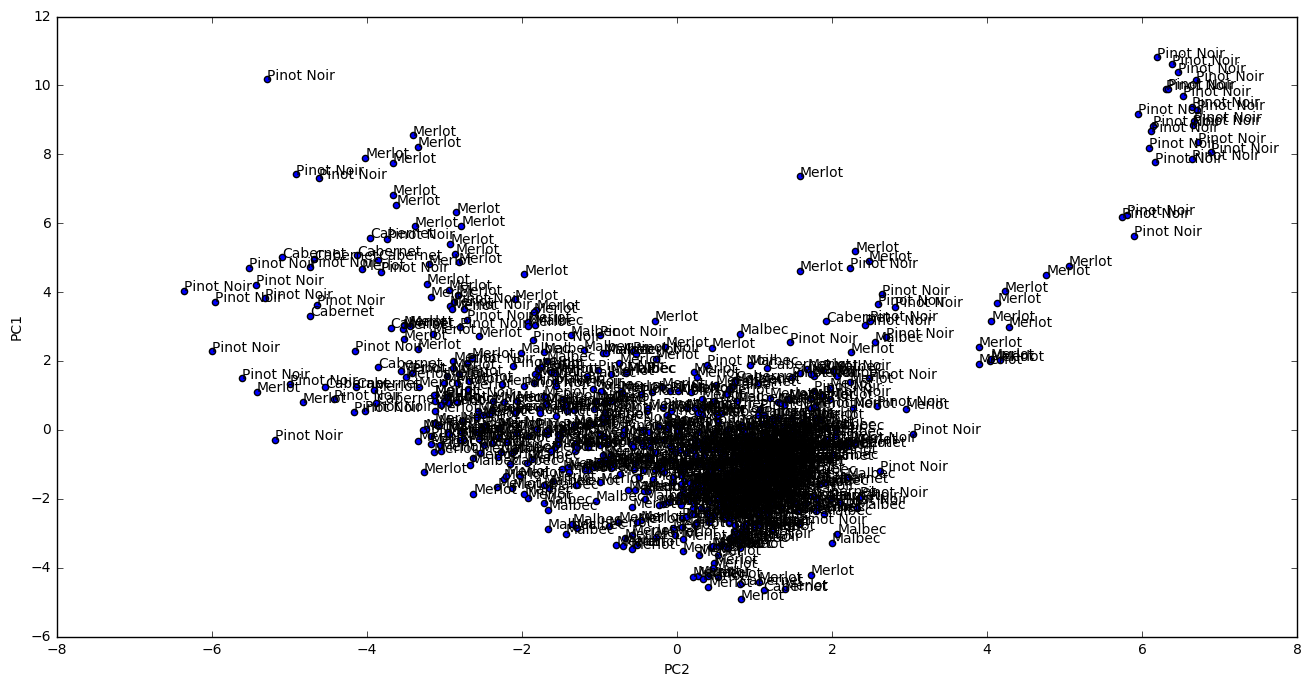

In [82]:
graph = YdataFrame.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, variety in enumerate(wines['Varietal']):
    graph.annotate(variety, (YdataFrame.iloc[i].PC2, YdataFrame.iloc[i].PC1))